In [1]:
%matplotlib inline
import pandas as pd

In [34]:
%matplotlib inline
import pandas as pd

In [2]:
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [40]:
r_d = pd.read_csv('data/release_dates.csv',index_col=None,parse_dates=['date'],infer_datetime_format=True)
r_d.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [6]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

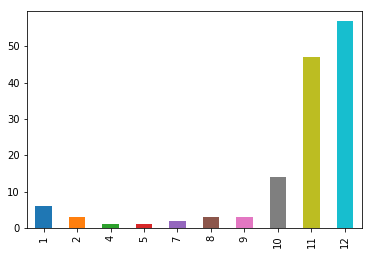

In [23]:
r = release_dates
r = r[r['title'].apply(lambda x:x.lower()).str.contains("christmas")]
r = r[r['country']=='USA']['date']
r.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

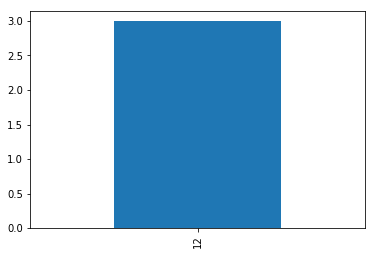

In [27]:
r = release_dates
r = r[r['title'].str.startswith("The Hobbit")]
r = r[r['country']=='USA']['date']
r.dt.month.value_counts().sort_index().plot(kind='bar')


### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

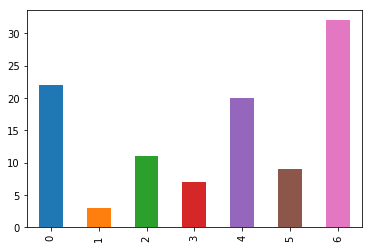

In [29]:
r = release_dates
r = r[r['title'].apply(lambda x:x.lower()).str.contains("romance")]
r = r[r['country']=='USA']['date']
r.dt.dayofweek.value_counts().sort_index().plot(kind='bar')


### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

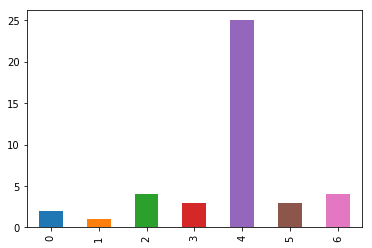

In [30]:
r = release_dates
r = r[r['title'].apply(lambda x:x.lower()).str.contains("action")]
r = r[r['country']=='USA']['date']
r.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [56]:
c = cast
r = release_dates
r = r[r['country']=='USA']
c = c[(c['name']=='Judi Dench') & (c['year']//10*10== 1990)]
c = c.merge(r)
c.date.dt.day

0    17
1    25
2    22
3     3
4     8
5    14
6    19
7    19
Name: date, dtype: int64

### In which months do films with Judi Dench tend to be released in the USA?

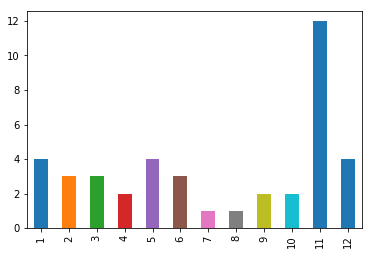

In [64]:
c = cast
r = release_dates
r = r[r['country']=='USA']
c = c[(c['name']=='Judi Dench')]
c = c.merge(r)
c.date.dt.month.value_counts().sort_index().plot(kind='bar')

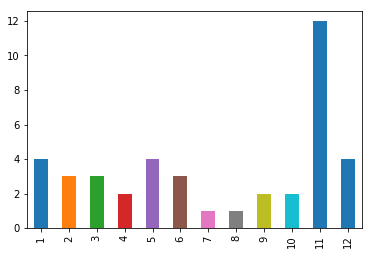

In [62]:
usa = release_dates[release_dates.country == 'USA']
c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort_values('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

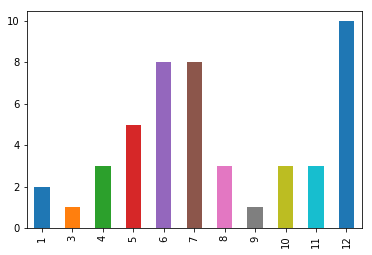

In [69]:
c = cast
r = release_dates
r = r[r['country']=='USA']
c = c[(c['name']=='Tom Cruise') ]
c = c.merge(r)
c.date.dt.month.value_counts().sort_index().plot(kind='bar')